Action1	"使用任何神经网络框架，对CIFAR-10进行分类
http://www.cs.toronto.edu/~kriz/cifar.html
训练集 50000，测试集 10000
图像大小 32*32 彩色
10个分类：ariplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck"			"1、完成代码（30points）
2、使用ResNet, DenseNet或其他网络（20points）
3、Accuracy >90% （20points）"	

In [1]:
import torch
from torch import nn, optim
import torch.nn.functional as F
import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import torchvision
import time

In [2]:
#读取数据                                     
train_data = datasets.CIFAR10(root="./cifar10", train=True, #训练集
                              transform=transforms.ToTensor(),# 将PIL Image或者numpy.ndarray转化为torch.FloatTensor，shape为(C,H,W)，并且归一化到[0.0, 1.0]
                              download=True)
                                               
test_data = datasets.CIFAR10(root="./cifar10", train=False,  #测试集
                             transform=transforms.ToTensor(), 
                             download=True)

Files already downloaded and verified
Files already downloaded and verified


In [3]:
print(test_data.data.shape)
print(train_data.data.shape)

(10000, 32, 32, 3)
(50000, 32, 32, 3)


(32, 32, 3)


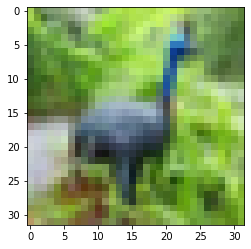

In [4]:
#输出图像
# img = transforms.ToPILImage()(train_data[6][0])
# plt.imshow(img)
# plt.show()

temp = train_data[6][0].numpy()
#print(temp.shape)
temp = temp.transpose(1, 2, 0)
print(temp.shape)
plt.imshow(temp)
plt.show()

In [14]:
# 使用DataLoader进行分批处理
# 超参数定义
EPOCH = 10               # 训练epoch次数
BATCH_SIZE = 128         # 分批训练的数量
LR = 0.001              # 学习率

train_loader = DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(dataset=test_data, batch_size=BATCH_SIZE)

In [15]:
#model = torchvision.models.resnet18(pretrained=True) # 10000张测试图像准确率:68.4300%
#model = torchvision.models.resnet18(pretrained=False) #10000张测试图像准确率:71.3800%
model = torchvision.models.resnet34(pretrained=True) # 10000张测试图像准确率:71.3800%

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to C:\Users\Administrator/.cache\torch\hub\checkpoints\resnet34-333f7ec4.pth


In [28]:
#损失函数
criterion = nn.CrossEntropyLoss()
#优化器
#optimizer = optim.Adam(model.parameters(), lr=LR)
optimizer = optim.Adam(model.parameters(), lr=1e-3)#10000张测试图像准确率:74.7800%

In [29]:
#定义device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
model.to(device)

cuda:0


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [30]:
#训练
for epoch in range(EPOCH):
    start_time = time.time()
    for i, data in enumerate(train_loader):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        # 前向传播
        outputs = model(inputs)
        # 计算损失函数
        loss = criterion(outputs, labels)
        # 清空上一轮梯度
        optimizer.zero_grad()
        # 反向传播
        loss.backward()
        # 参数更新
        optimizer.step()
    print("epoch{} loss:{: .4f} time{: .4f}".format(epoch+1, loss.item(), time.time()-start_time))

epoch1 loss: 0.1422 time 65.6111
epoch2 loss: 0.2208 time 65.5989
epoch3 loss: 0.1373 time 65.6534
epoch4 loss: 0.1804 time 65.6720
epoch5 loss: 0.2250 time 65.6001
epoch6 loss: 0.1677 time 65.6465
epoch7 loss: 0.2287 time 65.6360
epoch8 loss: 0.1393 time 65.6477
epoch9 loss: 0.3064 time 65.6838
epoch10 loss: 0.2447 time 65.6602


In [31]:
#保存训练模型
file_name = "cifar10_resnet.pt"
torch.save(model, file_name)
print(file_name + " saved")

cifar10_resnet.pt saved


In [32]:
#测试
model = torch.load(file_name)
model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [33]:
correct, total = 0, 0
for data in test_loader:
    images, labels = data
    images, labels = images.to(device), labels.to(device)
    # 前向传播
    out = model(images)
    # 预测结果
    _, predicted = torch.max(out.data, 1)
    # 判断预测结果与实际结果是否一致
    total += labels.size(0)
    correct += (predicted==labels).sum().item()

In [34]:
# 输出识别率
print("10000张测试图像准确率:{:.4f}%".format(100.0*correct/total))

10000张测试图像准确率:74.7800%


In [22]:
# 输出识别率
print("10000张测试图像准确率:{:.4f}%".format(100.0*correct/total))

10000张测试图像准确率:71.3800%


In [27]:
# 输出识别率
print("10000张测试图像准确率:{:.4f}%".format(100.0*correct/total))

10000张测试图像准确率:71.3800%
